In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

In [60]:
plays = pd.read_csv('/Users/Vu/Developer/Data/nfl-big-data-bowl-2023/plays.csv')
nfl_teams = pd.read_csv('/Users/Vu/Developer/Data/nfl-big-data-bowl-2023/cnizzardini:nfl_teams.csv')  #credit to cnizzardini on GitHub 
games = pd.read_csv('/Users/Vu/Developer/Data/nfl-big-data-bowl-2023/games.csv')

In [61]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [62]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore', 'passResult',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'foulName1',
       'foulNFLId1', 'foulName2', 'foulNFLId2', 'foulName3', 'foulNFLId3',
       'absoluteYardlineNumber', 'offenseFormation', 'personnelO',
       'defendersInBox', 'personnelD', 'dropBackType', 'pff_playAction',
       'pff_passCoverage', 'pff_passCoverageType'],
      dtype='object')

In [72]:
plays.isnull().sum()

gameId                         0
playId                         0
playDescription                0
quarter                        0
down                           0
yardsToGo                      0
possessionTeam                 0
defensiveTeam                  0
yardlineSide                 125
yardlineNumber                 0
gameClock                      0
preSnapHomeScore               0
preSnapVisitorScore            0
passResult                     0
penaltyYards                7801
prePenaltyPlayResult           0
playResult                     0
foulName1                   7821
foulNFLId1                  7821
foulName2                   8527
foulNFLId2                  8527
foulName3                   8556
foulNFLId3                  8556
absoluteYardlineNumber         1
offenseFormation               7
personnelO                     1
defendersInBox                 7
personnelD                     1
dropBackType                 528
pff_playAction                 0
pff_passCo

## Data Cleaning

In [64]:
nfl_teams = nfl_teams.drop(['ID'], axis=1)
nfl_teams.head()

,Name,Abbreviation,Conference,Division
0,Arizona Cardinals,ARI,NFC,West
1,Atlanta Falcons,ATL,NFC,South
2,Baltimore Ravens,BAL,AFC,North
3,Buffalo Bills,BUF,AFC,East
4,Carolina Panthers,CAR,NFC,South


In [65]:
#Change plays abbr columns value LA -> LAR
plays.loc[plays['possessionTeam'] == 'LA','possessionTeam'] = 'LAR'
plays.loc[plays['defensiveTeam'] == 'LA','defensiveTeam'] = 'LAR'

## Data Wrangling

In [66]:
#Add conference & division columns for bother possession team and defensive team into plays table. 
cols = ['possessionTeam', 'defensiveTeam']
for col in cols:
    plays = plays.merge(nfl_teams[['Conference', 'Division', 'Abbreviation']], how='left',left_on=col, right_on='Abbreviation')
    plays.drop('Abbreviation', axis=1, inplace=True)
    plays.rename(columns = {'Conference':f'{col}Conference', 'Division':f'{col}Division'}, inplace=True)

In [67]:
plays_w_games = plays.merge(games)

## Ranking of all pass coverage plays called in the first 8 weeks of 2021 season

<Axes: title={'center': 'Top Pass Coverage Play Called For The First 8 Weeks of 2021 Season'}, ylabel='pff_passCoverage'>

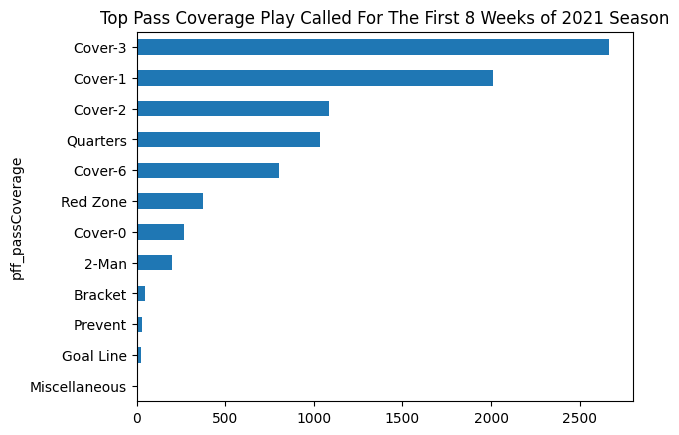

In [68]:
plays['pff_passCoverage'].value_counts().sort_values().plot(kind='barh', title='Top Pass Coverage Play Called For The First 8 Weeks of 2021 Season')


Summary:
- For the first 8 weeks in 2021 season, NFL teams seem to favor Cover-3 pass defense. From online sources, NFL defense do prefer Cover-3 defense due to it ability to provide pressure to the Quarterback   while at the same time cover deep sides and middle of the fields, a draw back can be it vulnerability to the flats.

## Top 5 pass coverage called in the first 8 week of NFL 2021 season 

<Figure size 640x480 with 0 Axes>

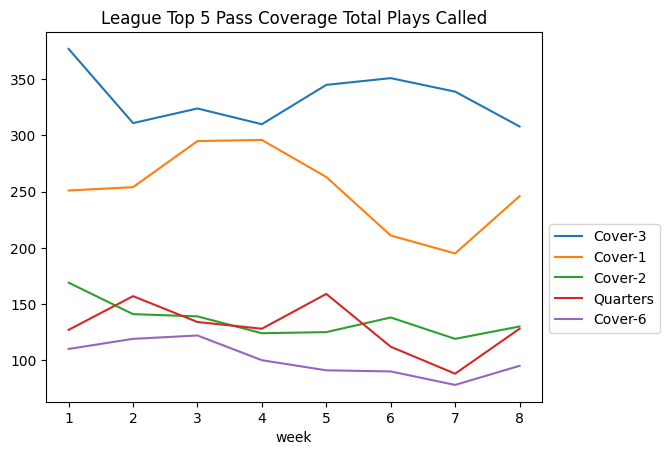

In [69]:
#Get top 5 pass coverage play
pass_coverage_top5 = plays_w_games['pff_passCoverage'].value_counts()[:5].index

#Pivot table to have top five pass coverage and it count by week. index = week, column = top 5 pass coverage
defensive_play_called = plays_w_games.groupby(['pff_passCoverage', 'week'])['pff_passCoverage'].count().reset_index(name='count')
defensive_play_called = defensive_play_called.pivot_table('count', index= 'week', columns='pff_passCoverage')[pass_coverage_top5]

#Generate a line graph showing all top 5 pass coverage trend over 8 weeks period
plt.figure()
defensive_play_called.plot()
plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5))
plt.title('League Top 5 Pass Coverage Total Plays Called')
plt.show()

## Ranking of all NFL Teams First 8 weeks Pass Coverage Plays Called

In [96]:
'''
Base on the top 5 defensive plays got called the first 8 weeks in the league, graph each nfc west count of each

stack vertical bar char order by team
'''

x = plays.groupby(['defensiveTeam','defensiveTeamConference', 'defensiveTeamDivision', 'pff_passCoverage'])['pff_passCoverage'].count().reset_index(name='count')
# x = x.query("defensiveTeamConference == 'NFC' & defensiveTeamDivision == 'West'")
# x = x.pivot_table('count', index = 'defensiveTeam', columns='pff_passCoverage')[pass_coverage_top5].T
# x.plot(kind='bar')

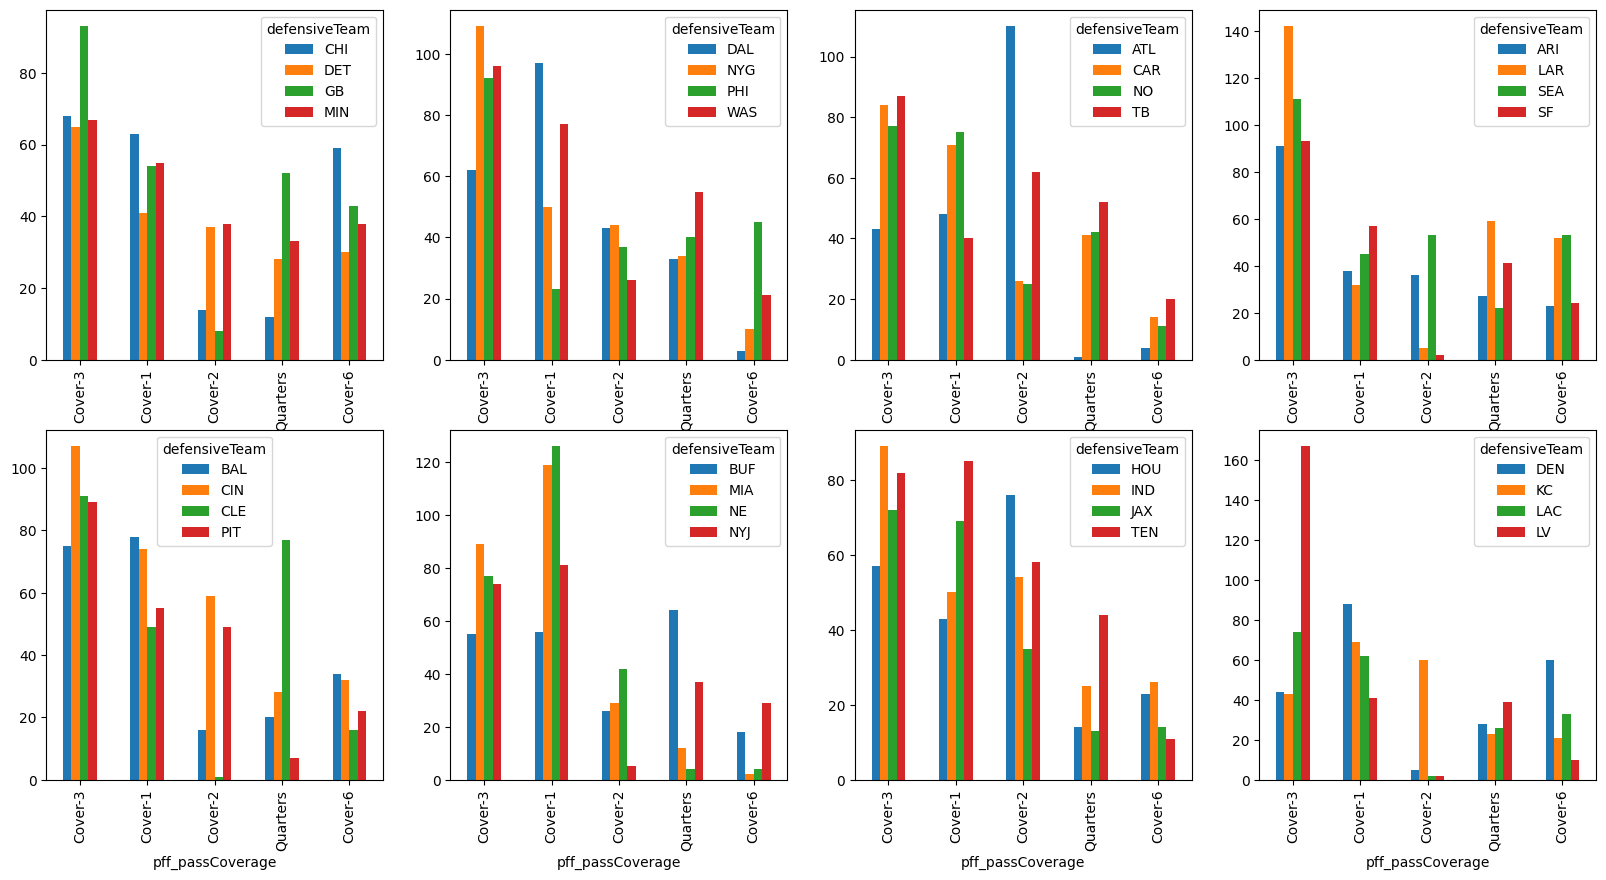

In [125]:
# # Create subplots with a 2x4 grid
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# # Flatten the axs array to simplify indexing
axs = axs.flatten()

conference = ['NFC', 'AFC']
division  = ['North', 'East', 'South', 'West']
combinations = list(itertools.product(conference, division))
x = plays.groupby(['defensiveTeam','defensiveTeamConference', 'defensiveTeamDivision', 'pff_passCoverage'])['pff_passCoverage'].count().reset_index(name='count')

for i, combinations in enumerate(combinations):
    #print(f"defensiveTeamConference == {c} & defensiveTeamDivision == {d}")
    ax = axs[i]
    c = combinations[0]
    d = combinations[1]
    select_set = x.query(f"defensiveTeamConference == '{c}' & defensiveTeamDivision == '{d}'")
    select_set = select_set.pivot_table('count', index = 'defensiveTeam', columns='pff_passCoverage')[pass_coverage_top5].T
    select_set.plot(kind='bar', ax=ax)
    

axs[2].set_xlabel('X-axis')
plt.show()